# Clearing an Orbit
## A formal investigation into how Pluto tragically lost its planethood
### Collin Fitzpatrick, Alejandro Wang, Alan Wu

### Background
According to the International Astronomical Union, a celestial body must meet three criteria to be considered a planet.

1. It must orbit a star (in our cosmic neighborhood, the Sun). 
2. It must be big enough to have enough gravity to force it into a spherical shape. 
3. It must be big enough that its gravity cleared away any other objects of a similar size near its orbit around the Sun. 

### Goal
We would like to build a simulation that can model how a large planet object orbiting the sun interacts with smaller bodies in its path. 

Some questions we have include:
- How big must the planet be relative to the bodies in order to clear the orbit?
- Where do the small bodies end up? As moons? Thrown out of solar system? Thrown into the planet or the sun?

### The Setup
**note that all variables with subscript j refer to the planet (as if it was jupiter)*

<img src="phys24Image2.jpeg" alt="drawing" width="500"/>

From independent variables $r$, $r_j$, $\theta_1$, and $\theta_2$ we can derive expressions for the distance $s$ between the orbiting bodies and the angle $\theta_3$ between the planet and the sun with the small body at the vertex.

Using the law of cosines,
$$s^2=r^2+r_j^2-2rr_j\cos(\theta_2-\theta_1)$$
$$\theta_3=\cos^{-1}\left(\frac{r_j^2-s^2-r^2}{-2sr}\right)$$

Additionally, if we use units of astronomical units for length, sun mass units for mass, and years for time, we can derive the following useful expression:
$$GM_{sun}=4\pi^2$$

#### Equations of Motion

##### Planet (Assuming Small Body Has Negligible Mass)

For simplicity, we originally assumed that the mass of the smaller body is negligible in comparison to the planet. In this case, the motion of the planet is unaffected by the presence of the body, and the only force on the planet is the gravitational attraction to the sun (which we assume is stationary: $M_{sun}>>M_{j}$).

This yields the following equation of motion for the planet:
\begin{align}
    \Sigma \vec{F} &= \vec{F_s} = -G\frac{M_sM_j}{r_j^2}\hat{r} \\
    \text{assuming a circular orbit: } F_s &= F_{centripetal}  \\
    \text{resulting in: } \omega &= \sqrt{\frac{GM_s}{r^3}} \\
    \theta_1 (t)&=\sqrt{\frac{GM_s}{r^3}}t
\end{align}

As expected, the planet will orbit at a constant angular velocity at a constant radial distance.

##### Planet (Assuming Small Body Has Significant Mass)

In order to analyze more complex situations, we assume that the small body's mass is not negligible. Therefore, we must account for its gravitational pull as well as the attraction of the sun.

Separately, these are given by:

$$ \vec{F_s}=-G\frac{M_sM_j}{r_j^2} \hat{r}$$
$$|F_b|=G\frac{M_jm}{s^2}$$ where $F_b$ is the force of the small body.
The sun's force is solely in the radial direction, but the pull of the small body can have components in both the radial and tangential directions. These components, in terms of $\theta_4$, are given by:
$$\vec{F_{b\theta}}=|F_b|\sin(\theta_4)\hat{\theta}$$
$$\vec{F_{br}}=-|F_b|\cos(\theta_4)\hat{r}$$
We can derive an expression for $\theta_4$ based on the other angles:
$$\theta_4=\pi - [\theta_3 + (\theta_2 - \theta_1)]$$
The gravitational force of the small body is the only force in the tangential direction, yielding:
\begin{align}
    \Sigma \vec{F_\theta} = \vec{F_{b\theta}} &= |F_b|\sin(\theta_4)\hat{\theta}\\
    \Sigma \vec{F_\theta} = M_j\vec{a_\theta} &= G\frac{M_jm}{s^2}\sin(\theta_4)\hat{\theta}\\
    \vec{a_\theta} &= r_j\ddot{\theta_j} + 2\dot{\theta_j}\dot{r_j} \\
    \ddot{\theta_j} &= G\frac{m\sin(\theta_4)}{r_js^2}-\frac{2\dot{\theta_j}\dot{r_j}}{r_j}\hat{\theta}
\end{align}

The sun and the small body both contribute to the force in the radial direction, yielding the following equation for radial acceleration:

\begin{align}
    \Sigma \vec{F_r} = \vec{F_s}+\vec{F_{br}} &= -\left(G\frac{M_sM_j}{r_j^2}+|F_b|\cos(\theta_4)\right)\hat{r}\\
    \Sigma \vec{F_r} = M_j\vec{a_r} &= -\left(G\frac{M_sM_j}{r_j^2}+G\frac{M_jm\cos(\theta_4)}{s^2}\right)\hat{r}\\
    \vec{a_{r}} &= \ddot{r_j}-r_j\dot{\theta_j}^2 \\
    \ddot{r_j} &= -\left(G\frac{M_s}{r_j^2}+G\frac{m\cos(\theta_4)}{s^2}\right)+r_j\dot{\theta_j}^2\hat{r}
\end{align}
We have now derived equations for the radial and tangential accelerations of the planet which we can use to fully simulate its motion.

##### Small Body

The small body has similarly complicated equations, though somewhat symmetrical to the equations of the planet. Its mass $m$ is affected by the gravity of the planet as well as the attraction of the sun. Separately, these are given by:

$$ \vec{F_s}=-G\frac{M_sm}{r^2} \hat{r}$$
$$|F_j|=G\frac{M_jm}{s^2}$$
The sun's force is solely in the radial direction, but the pull of the planet can have components in both the radial and tangential directions. These components, in terms of $\theta_3$, are given by:
$$\vec{F_{j\theta}}=-|F_j|\sin(\theta_3)\hat{\theta}$$
$$\vec{F_{jr}}=-|F_j|\cos(\theta_3)\hat{r}$$
The gravitational force of the planet is the only force in the tangential direction, yielding:
\begin{align}
    \Sigma \vec{F_\theta} = \vec{F_{j\theta}} &= -|F_j|\sin(\theta_3)\hat{\theta}\\
    \Sigma \vec{F_\theta} = m\vec{a_\theta} &= -G\frac{M_jm}{s^2}\sin(\theta_3)\hat{\theta}\\
    \vec{a_\theta} &= r\ddot{\theta}+2\dot{\theta}\dot{r} \\
    \ddot{\theta} &= -G\frac{M_j\cos(\theta_3)}{rs^2}-\frac{2\dot{\theta}\dot{r}}{r}\hat{\theta}
\end{align} 
The sun and the planet both contribute to the force in the radial direction, yielding the following equation for radial acceleration:
\begin{align}
    \Sigma \vec{F_r} = \vec{F_s}+\vec{F_{jr}} &= -\left(G\frac{M_sm}{r^2}+|F_j|\cos(\theta_3)\right)\hat{r}\\
    \Sigma \vec{F_r} = m\vec{a_\theta} &= -\left(G\frac{M_sm}{r^2}+G\frac{M_jm\cos(\theta_3)}{s^2}\right)\hat{r}\\
    \vec{a_r} &= \ddot{r}-r\dot{\theta}^2 \\
    \ddot{r} &= -\left(G\frac{M_s}{r^2}+G\frac{M_j\cos(\theta_3)}{s^2}\right)+r\dot{\theta}^2\hat{r}
\end{align}
We have now derived equations for the radial and tangential accelerations of the small body which we can use to fully simulate its motion.

#### Code

##### Import Libraries
We will be using numpy, matplotlib, and the P24ASolver class, which incorporates scipy integration tools.

In [25]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from p24asolver import P24ASolver
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
collisionPlanet = False
collisionBodySun = False
collisionPlanetSun = False
ejected = False
planetDeviated = False

class pluto(P24ASolver):
    """
    Simulate a planet orbiting the sun with another body in the same orbit.
    """

    def __init__(self, **kwargs):
        super().__init__(
            (('r', '$r_{body}$'), ('rDot', r'$\dot{r_{body}}$'),
             ('rj', '$r_{planet}$'), ('rjDot', '$\dot{r_{planet}}$'), ('theta', r'$\theta_{body}$'), ('thetaDot', '$\dot{\theta_{body}}$'), ('jTheta', r'$\theta _{planet}$'), ('jThetaDot2', '$\dot{\theta_{planet}}$'))
        )
        self.rj = kwargs.get('rj', 5.2) # orbit radius of the planet in AU
        self.mj = kwargs.get('mj', 9.5e-4) # planet mass in solar masses, 9.5e-4 is jupiter's real mass
        self.r = kwargs.get('r', 5.2) # orbit radius of the small body
        self.m = kwargs.get('m', 9.5e-7) # small body mass in solar masses
        self.rtol = kwargs.get('rtol', 1e-10)
        self.atol = kwargs.get('atol', 1e-10)

    def derivatives(self, t, Y):
        GMs = 4*np.pi**2 # note, in solar masses/AU/years, G*Ms= 4pi^2
        r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot = Y  # unpack the values
        sSquared = r**2 + rj**2 - 2*r*rj*np.cos(theta - jTheta)#distance between the masses squared
        theta3 = np.arccos((rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r)) #angle between sun and planet with planetesimal as axis
        
        y = (theta - jTheta) % (2*np.pi) # sign adjustment to allow theta 3 to take negative values
        theta3*= (y<np.pi)*2-1
        
        theta4 = np.pi - (theta3 +(theta - jTheta)) # top right angle in triangle
        
        #from equations of motion
        rDDot = -1 * (GMs/r**2 + GMs*self.mj*np.cos(theta3)/sSquared) + r*thetaDot**2
        rjDDot = -1 * (GMs/rj**2 + GMs*self.m*np.cos(theta4)/sSquared) + rj*jThetaDot**2
        thetaDDot = -GMs*self.mj*np.sin(theta3)/(r*sSquared) - 2*thetaDot*rDot/r
        jThetaDDot = GMs*self.m*np.sin(theta4)/(rj*sSquared) - 2*jThetaDot*rjDot/rj
        
        # track if any important events have occurred
        global collisionBodySun, collisionPlanetSun, collisionPlanet, ejected
        if r<0.0046524726:
            collisionBodySun= True
        elif rj <  0.0046524726:
            collisionPlanetSun = True
        elif sSquared < 0.00047789450254522:
            collisionPlanet = True
        elif r > 30:
            ejected = True
        elif rj - 5.3 > 0.5:
            planetDeviated = True
            
        return [rDot, rDDot, rjDot, rjDDot,
                thetaDot, thetaDDot, jThetaDot, jThetaDDot]

    def prepare_figure(self):
        """
        Function that creates the figure and axes for the animation.
        """

        fig, ax = plt.subplots(figsize=(10, 10))
        # We need to set the axes limits so each frame uses the same limits
        # I'll say that the center position of the first mass is at 2 and the second at 4
        ax.set_xlim((-20, 20))
        ax.set_ylim((-20, 20))

        
        sun = Circle((0, 0), radius=0.2, color='y')
        ax.add_patch(sun)

        return fig, ax

    def draw_frame(self, t):
        """
        Draw frame for time t
        """

        r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot = self(t)
        
        self.shape = []
        
        jupiter = Circle((rj * np.cos(jTheta), rj * np.sin(jTheta)), radius=0.06, color="r")
        small_body = Circle((r * np.cos(theta), r * np.sin(theta)), radius=0.06, color="b")
        sun = Circle((0, 0), radius=0.2, color='y')

        # render
        self._ax.add_patch(jupiter)
        self._ax.add_patch(small_body)
        self._ax.add_patch(sun)
        
        self.shape.append(jupiter)
        self.shape.append(small_body)

        title = self._ax.set_title(f"t = {t:.2f}", usetex=False)

        # By returning the list of Artists that have changed,
        # we speed up the animation
        return self.shape, title

# First, the fun stuff. Here are some cool-looking simulations we found.

### "The Dance"

<IPython.core.display.Javascript object>


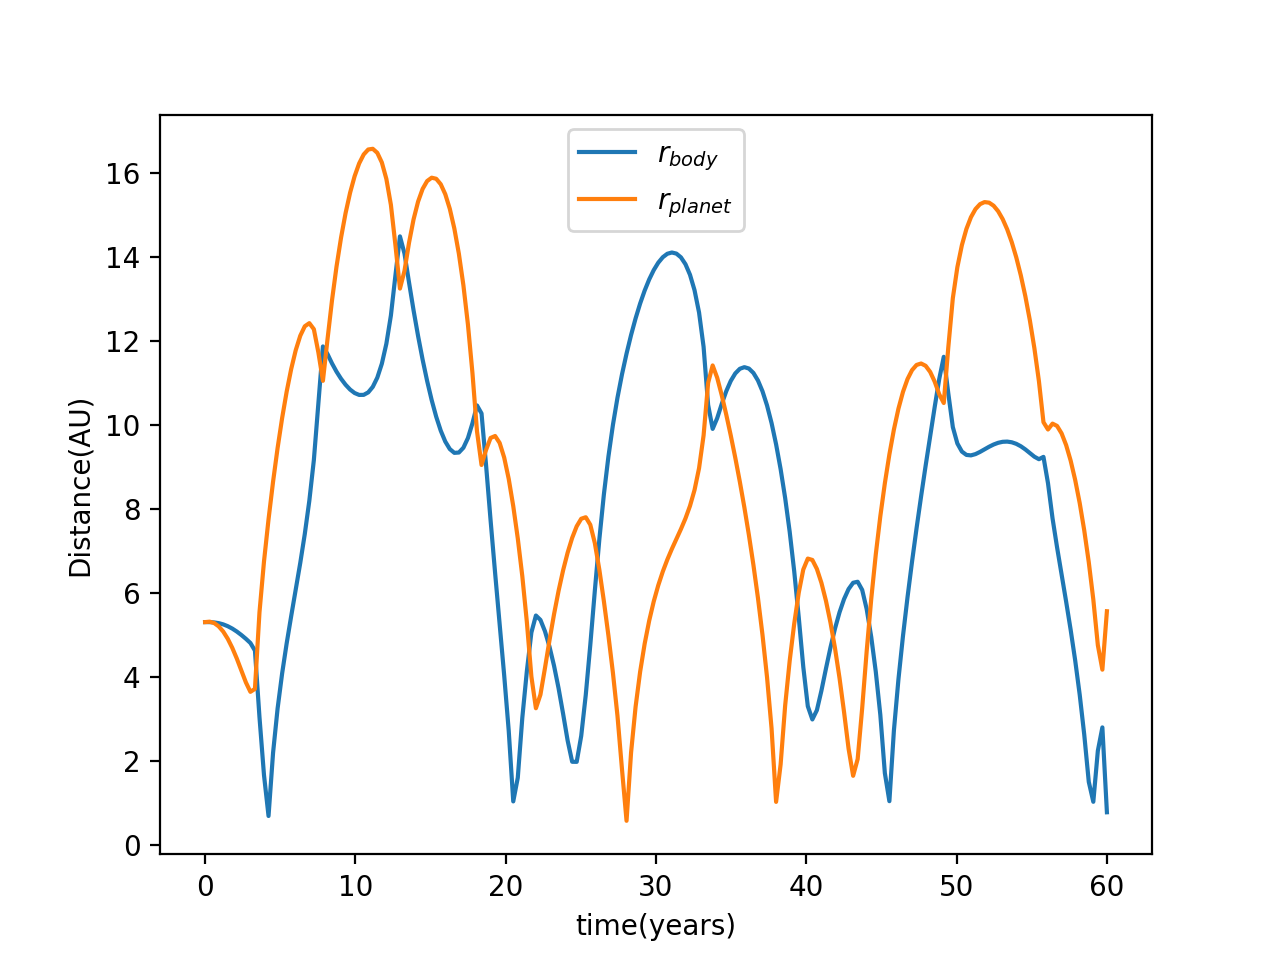

<IPython.core.display.Javascript object>


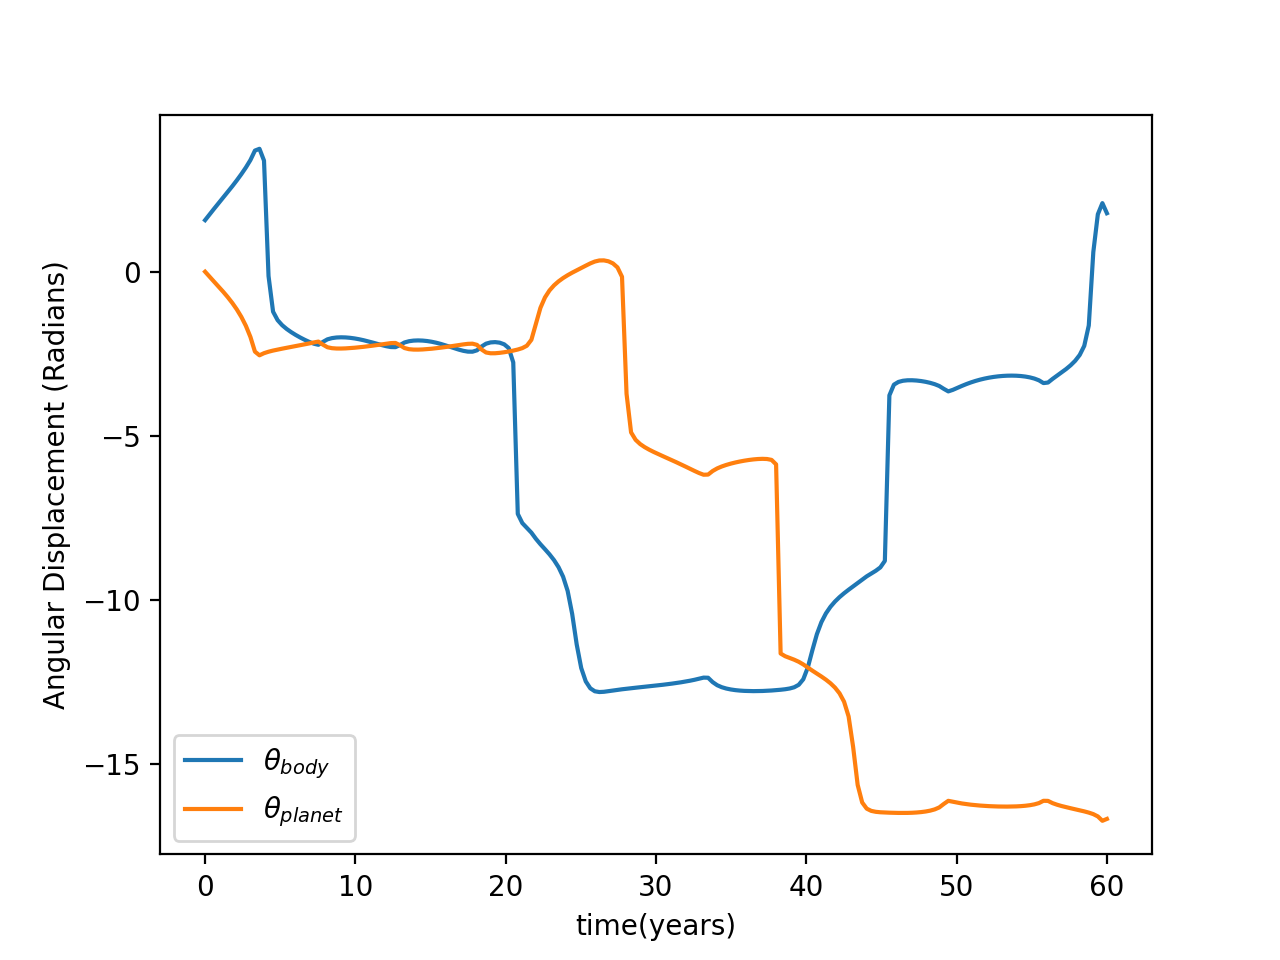

<IPython.core.display.Javascript object>


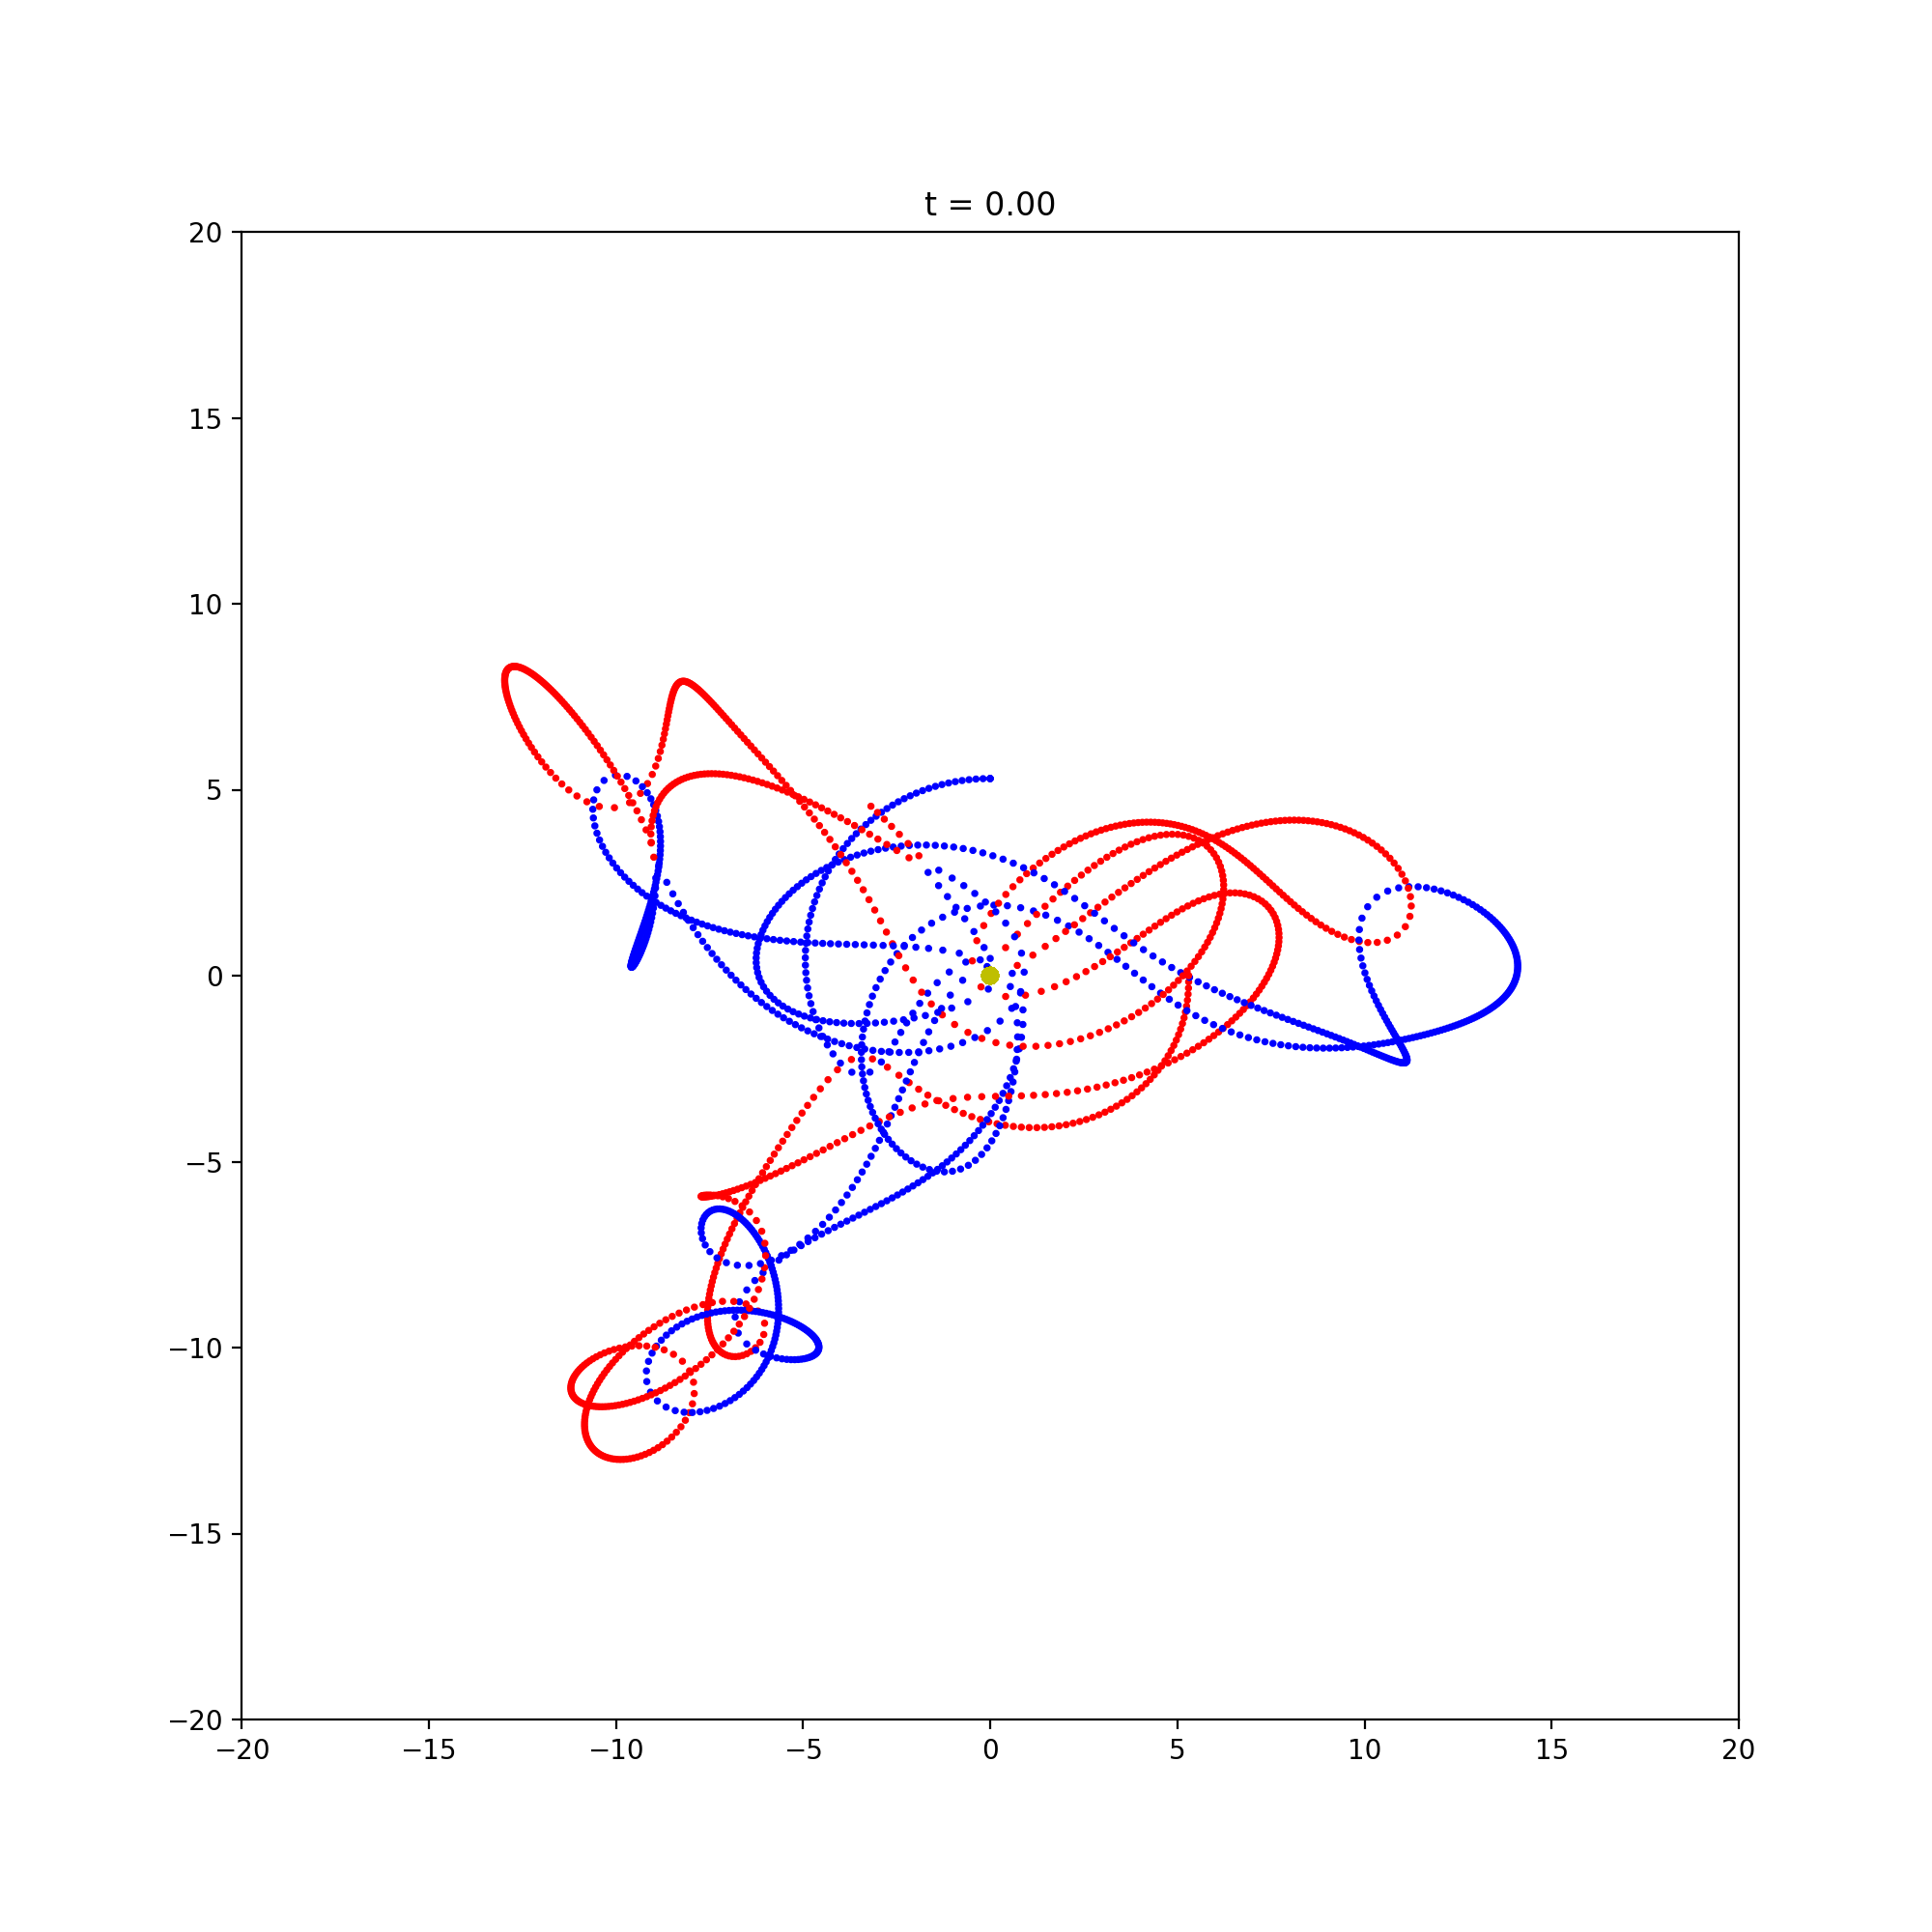

In [71]:
times = np.linspace(0, 60, 200)

# initial parameters
r = 5.3
rDot =1
rj = 5.3
rjDot = 0.1
theta = np.pi/2
thetaDot = 1
jTheta = 1
jThetaDot = np.sqrt(4*np.pi**2/(5.2)**3) #jupiter starts in roughly circular orbit

sol1 = pluto().solve((5.3, 0, 5.3, 0.1, np.pi/2, 0.6, 0, -1*jThetaDotInitial), (0,60))

#graphs of radii and theta
sol1.plot(times, ['r','rj'], x_axis = "time(years)", y_axis = "Distance(AU)")
sol1.plot(times, ['theta','jTheta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)")

#takes a while but worth it
sol1.animate(1000)



### "The Helix"

<IPython.core.display.Javascript object>


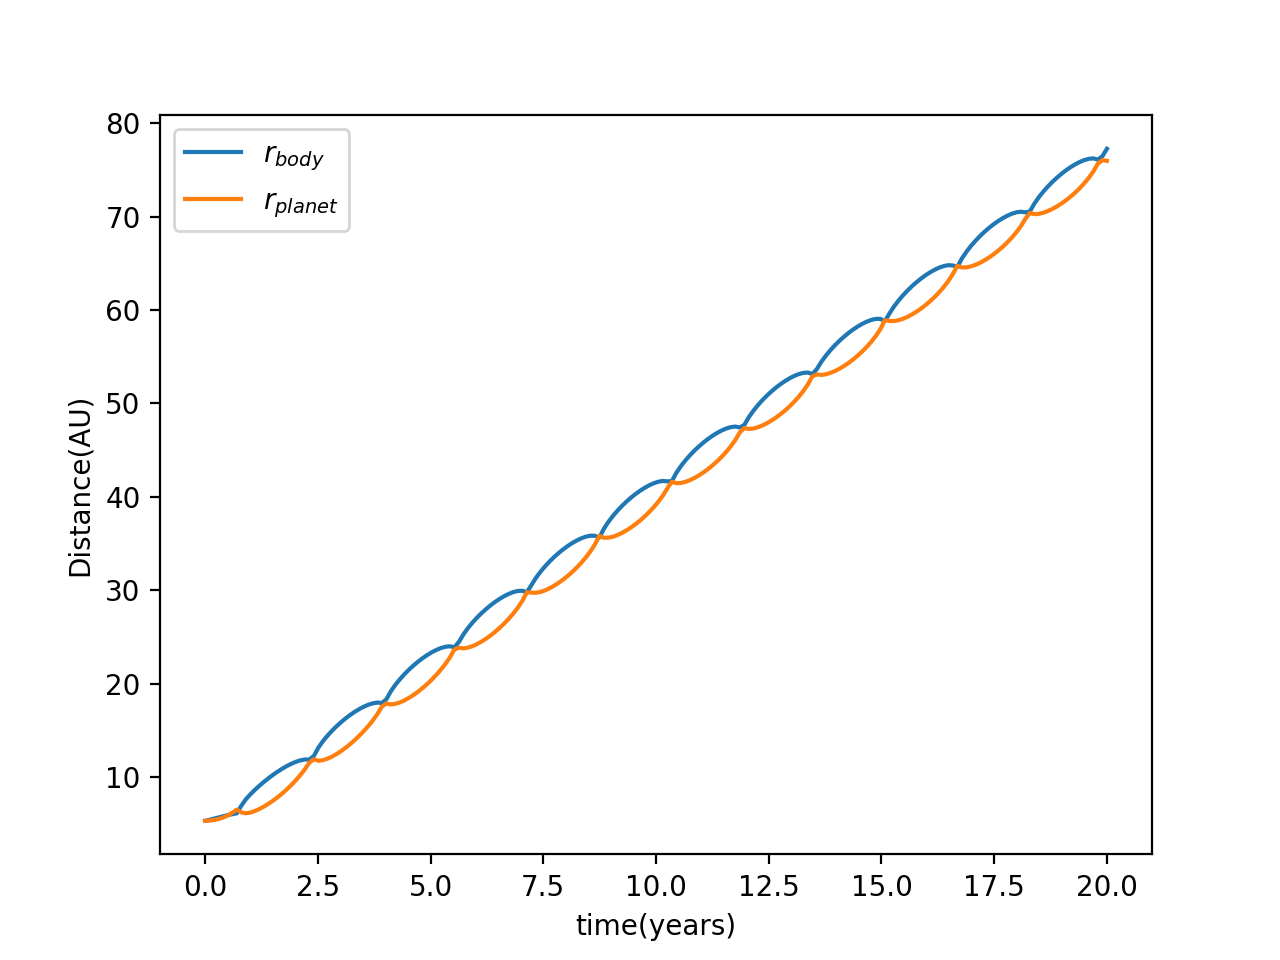

<IPython.core.display.Javascript object>


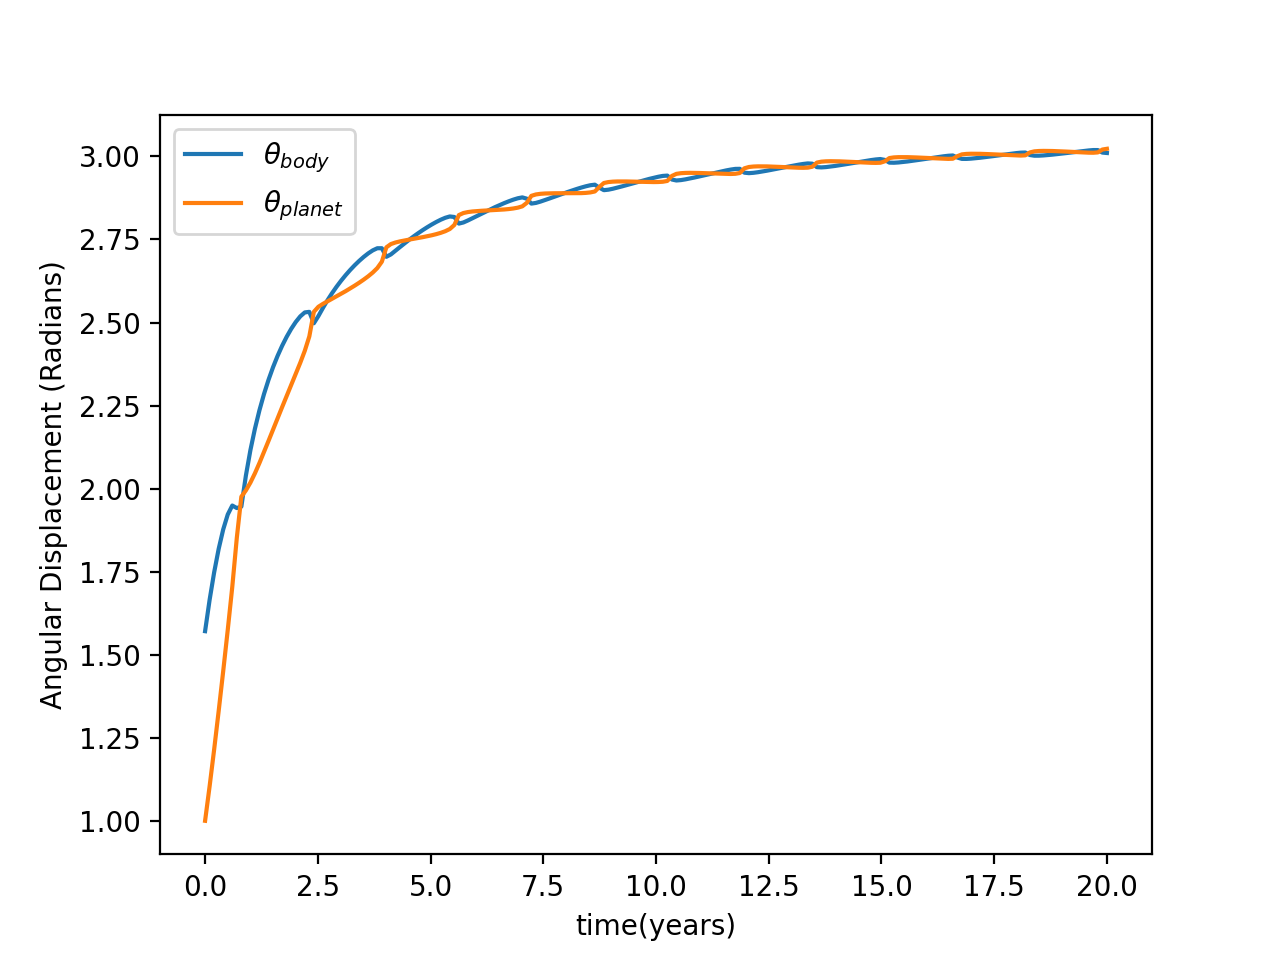

<IPython.core.display.Javascript object>


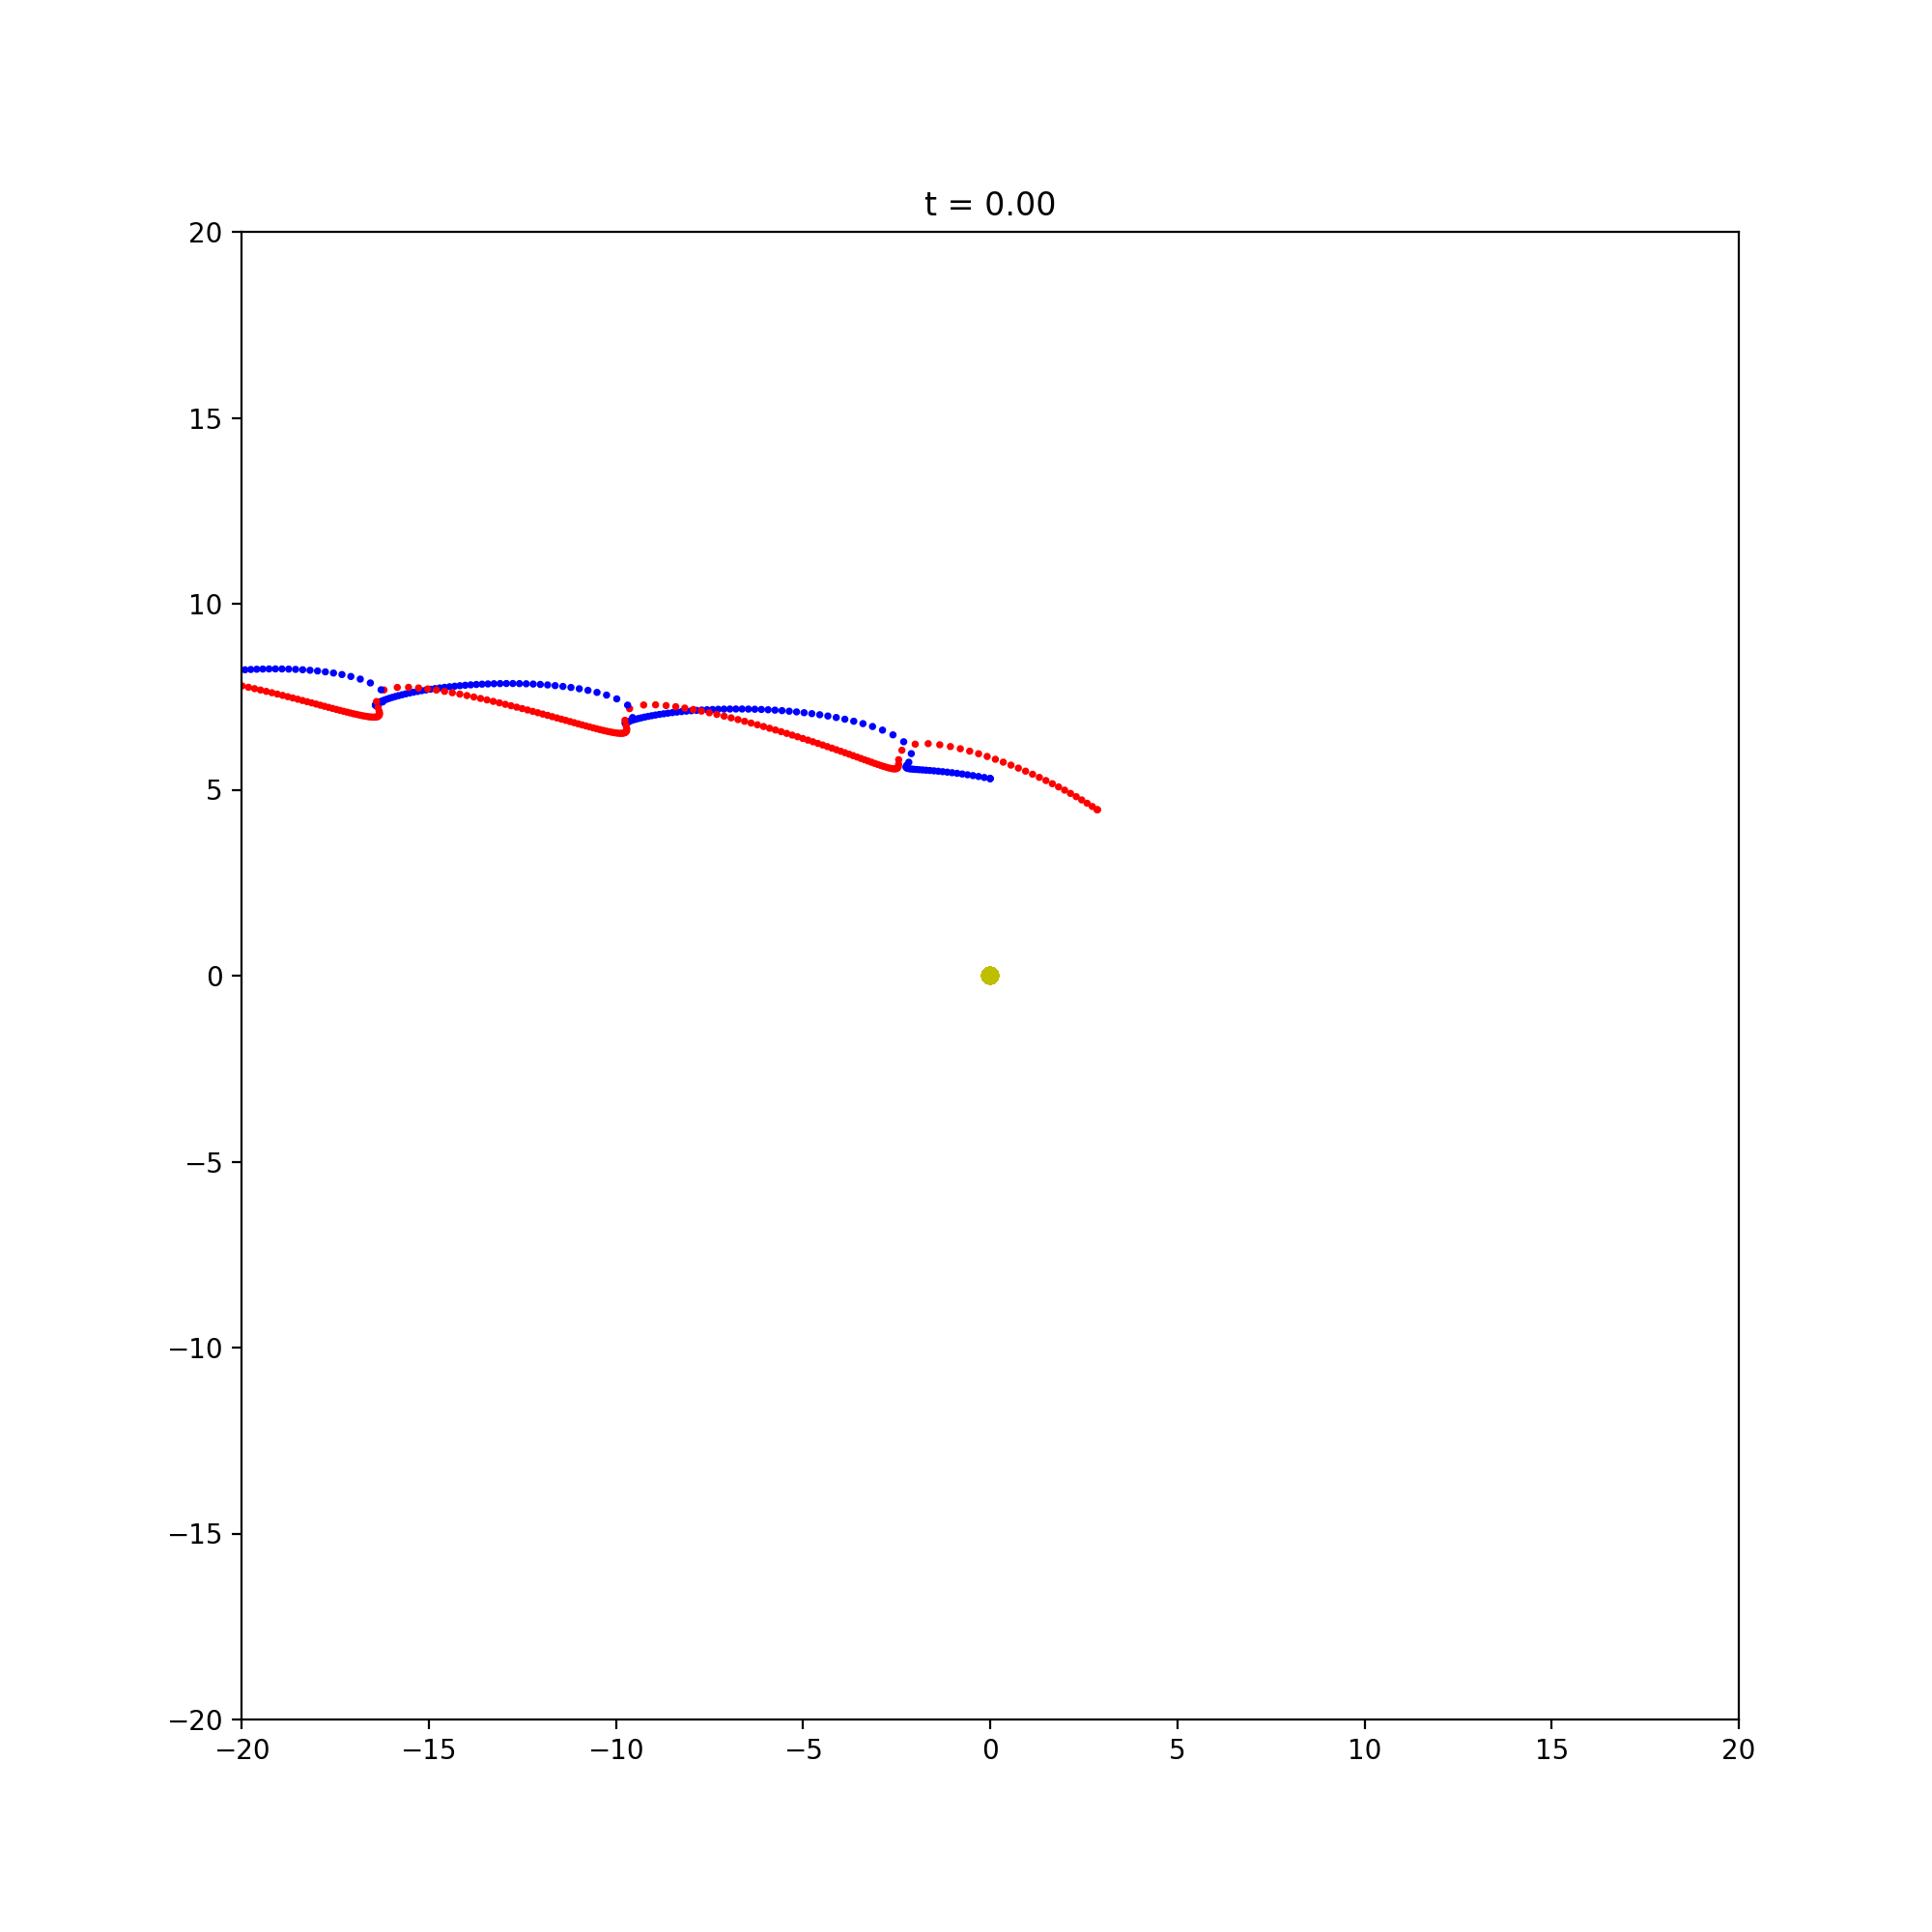

In [75]:
times = np.linspace(0, 20, 200)

# initial conditions
r = 5.3
rDot =1
rj = 5.3
rjDot = 0.1
theta = np.pi/2
thetaDot = 1
jTheta = 1
jThetaDot = 1

#graphs of radii and theta
sol1.plot(times, ['r','rj'], x_axis = "time(years)", y_axis = "Distance(AU)")
sol1.plot(times, ['theta','jTheta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)")



sol1.animate(2000)


# Simulation Loop
We wrote code to generate simulations with random starting points. By running sets of simulations with different starting parameters for mass, we can see how ejection dynamics change with planet size.

In [81]:


def randomBigPlutoGenerator(numSimulations):
    '''runs multiple simulations of our negligibleMassPluto class with random starting points, 
    plots and simulates results'''
    global collisionBodySun, collisionPlanetSun, collisionPlanet, ejected, planetDeviated

    times = np.linspace(0, 20, 401) 
    collisionPlanetCount = 0
    collisionBodySunCount = 0
    collisionPlanetSunCount = 0
    ejectedCount = 0
    planetDeviatedCount = 0
    for i in range(numSimulations):
        #y = r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot2 = Y  
        r = random.uniform(5, 6)
        rDot = random.uniform(-0.5, 0.5)
        theta = random.uniform(0, np.pi*2)
        thetaDot = random.uniform(-0.5, 0.5)
        rj = 5.3
        rjDot = 0.001
        jTheta = 0
        jThetaDot = np.sqrt(4*np.pi**2/(5.2)**3)
        sol2 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,20))  #.plot(times, ['r','theta','rj', 'jTheta']);
        #sol2.animate(300)
        collisionPlanetCount += collisionPlanet
        collisionBodySunCount += collisionBodySun
        collisionPlanetSunCount += collisionPlanetSun
        ejectedCount += ejected
        planetDeviatedCount += planetDeviated
        print(f"trialnumber ={i}")
        collisionPlanet = False
        collisionBodySun = False
        collisionPlanetSun = False
        ejected = False
        planetDeviated = False
    print(f"collisionPlanetCount={collisionPlanetCount}, collisionBodySunCount={collisionBodySunCount}, collisionPlanetSunCount={collisionPlanetSunCount}, ejectedCount={ejectedCount}, planetDeviatedCount = {planetDeviatedCount})")


randomBigPlutoGenerator(1000)
print("done")

trialnumber =0
trialnumber =1
trialnumber =2
trialnumber =3
trialnumber =4
trialnumber =5
trialnumber =6
trialnumber =7
trialnumber =8
trialnumber =9
trialnumber =10
trialnumber =11
trialnumber =12
trialnumber =13
trialnumber =14
trialnumber =15
trialnumber =16
trialnumber =17
trialnumber =18
trialnumber =19
trialnumber =20
trialnumber =21
trialnumber =22
trialnumber =23
trialnumber =24
trialnumber =25
trialnumber =26
trialnumber =27
trialnumber =28
trialnumber =29
trialnumber =30
trialnumber =31
trialnumber =32
trialnumber =33
trialnumber =34
trialnumber =35
trialnumber =36
trialnumber =37
trialnumber =38
trialnumber =39
trialnumber =40
trialnumber =41
trialnumber =42
trialnumber =43
trialnumber =44
trialnumber =45
trialnumber =46
trialnumber =47
trialnumber =48
trialnumber =49
trialnumber =50
trialnumber =51
trialnumber =52
trialnumber =53
trialnumber =54
trialnumber =55
trialnumber =56
trialnumber =57
trialnumber =58
trialnumber =59
trialnumber =60
trialnumber =61
trialnumber =62
tr

<ipython-input-80-7af1d51a0bab>:28: RuntimeWarning: invalid value encountered in arccos
  theta3 = np.arccos((rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r)) #angle between sun and planet with planetesimal as axis


trialnumber =152
trialnumber =153
trialnumber =154
trialnumber =155
trialnumber =156
trialnumber =157
trialnumber =158
trialnumber =159
trialnumber =160
trialnumber =161
trialnumber =162
trialnumber =163
trialnumber =164
trialnumber =165
trialnumber =166
trialnumber =167
trialnumber =168
trialnumber =169
trialnumber =170
trialnumber =171
trialnumber =172
trialnumber =173
trialnumber =174
trialnumber =175
trialnumber =176
trialnumber =177
trialnumber =178
trialnumber =179
trialnumber =180
trialnumber =181
trialnumber =182
trialnumber =183
trialnumber =184
trialnumber =185
trialnumber =186
trialnumber =187
trialnumber =188
trialnumber =189
trialnumber =190
trialnumber =191
trialnumber =192
trialnumber =193
trialnumber =194
trialnumber =195
trialnumber =196
trialnumber =197
trialnumber =198
trialnumber =199
trialnumber =200
trialnumber =201
trialnumber =202
trialnumber =203
trialnumber =204
trialnumber =205
trialnumber =206
trialnumber =207
trialnumber =208
trialnumber =209
trialnumber =2

trialnumber =634
trialnumber =635
trialnumber =636
trialnumber =637
trialnumber =638
trialnumber =639
trialnumber =640
trialnumber =641
trialnumber =642
trialnumber =643
trialnumber =644
trialnumber =645
trialnumber =646
trialnumber =647
trialnumber =648
trialnumber =649
trialnumber =650
trialnumber =651
trialnumber =652
trialnumber =653
trialnumber =654
trialnumber =655
trialnumber =656
trialnumber =657
trialnumber =658
trialnumber =659
trialnumber =660
trialnumber =661
trialnumber =662
trialnumber =663
trialnumber =664
trialnumber =665
trialnumber =666
trialnumber =667
trialnumber =668
trialnumber =669
trialnumber =670
trialnumber =671
trialnumber =672
trialnumber =673
trialnumber =674
trialnumber =675
trialnumber =676
trialnumber =677
trialnumber =678
trialnumber =679
trialnumber =680
trialnumber =681
trialnumber =682
trialnumber =683
trialnumber =684
trialnumber =685
trialnumber =686
trialnumber =687
trialnumber =688
trialnumber =689
trialnumber =690
trialnumber =691
trialnumber =6

# 1000 Twenty Year Trials

# __small body 1/1000th size of planet__

- Body and Planet collided: 24
- Body and Sun collided: 60
- Planet and Sun collided: 0
- Body was ejected from system: 663

# __small body 1/100th size of planet__

- Body and Planet collided: 2
- Body and Sun collided: 88
- Planet and Sun collided: 0
- Body was ejected from system: 643

# __small body 1/10th size of planet__

- Body and Planet collided: 5
- Body and Sun collided: 63
- Planet and Sun collided: 0
- Body was ejected from system: 684

# __small body same size as planet__

- Body and Planet collided: 0
- Body and Sun collided: 75
- Planet and Sun collided: 0
- Body was ejected from system: 660

# __both body same size as sun__ (only 100 simulations)
- Body and Planet collided: 18
- Body and Sun collided: 10
- Planet and Sun collided: 3
- Body was ejected from system: 59


# Our code returned this simulation as "body hits sun"...the animation aligns with that

<IPython.core.display.Javascript object>


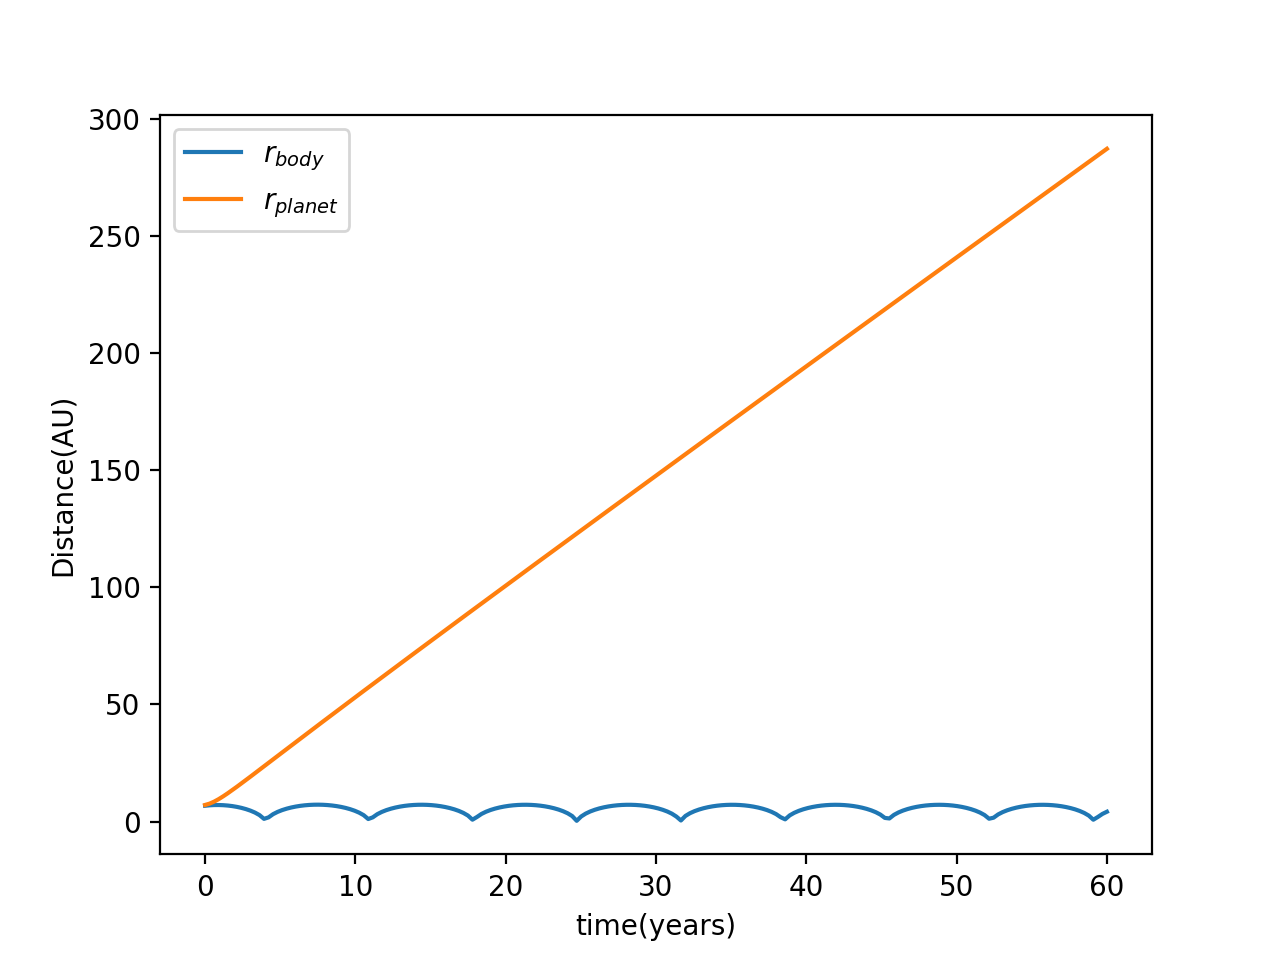

<IPython.core.display.Javascript object>


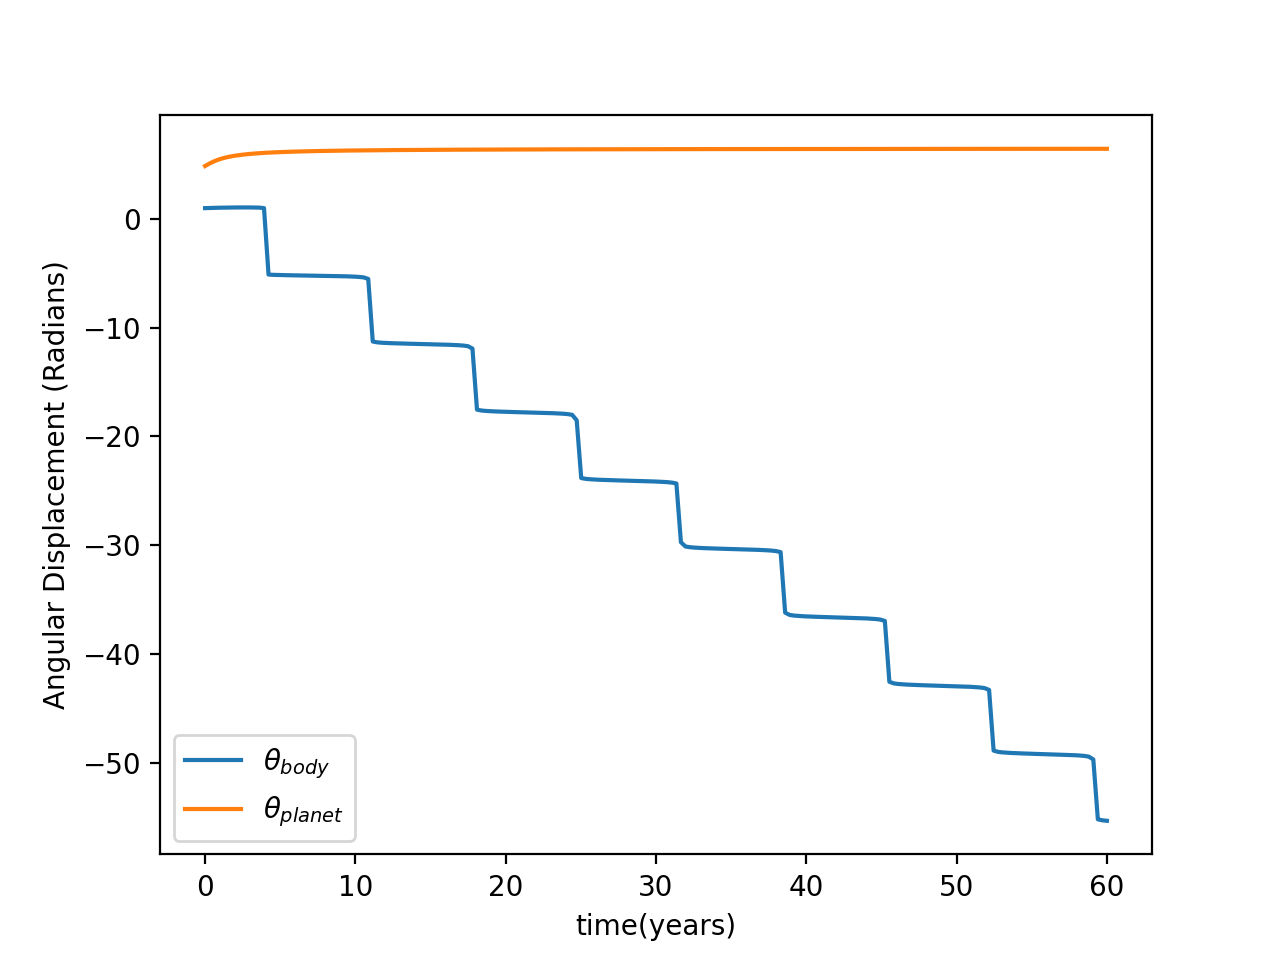

<IPython.core.display.Javascript object>


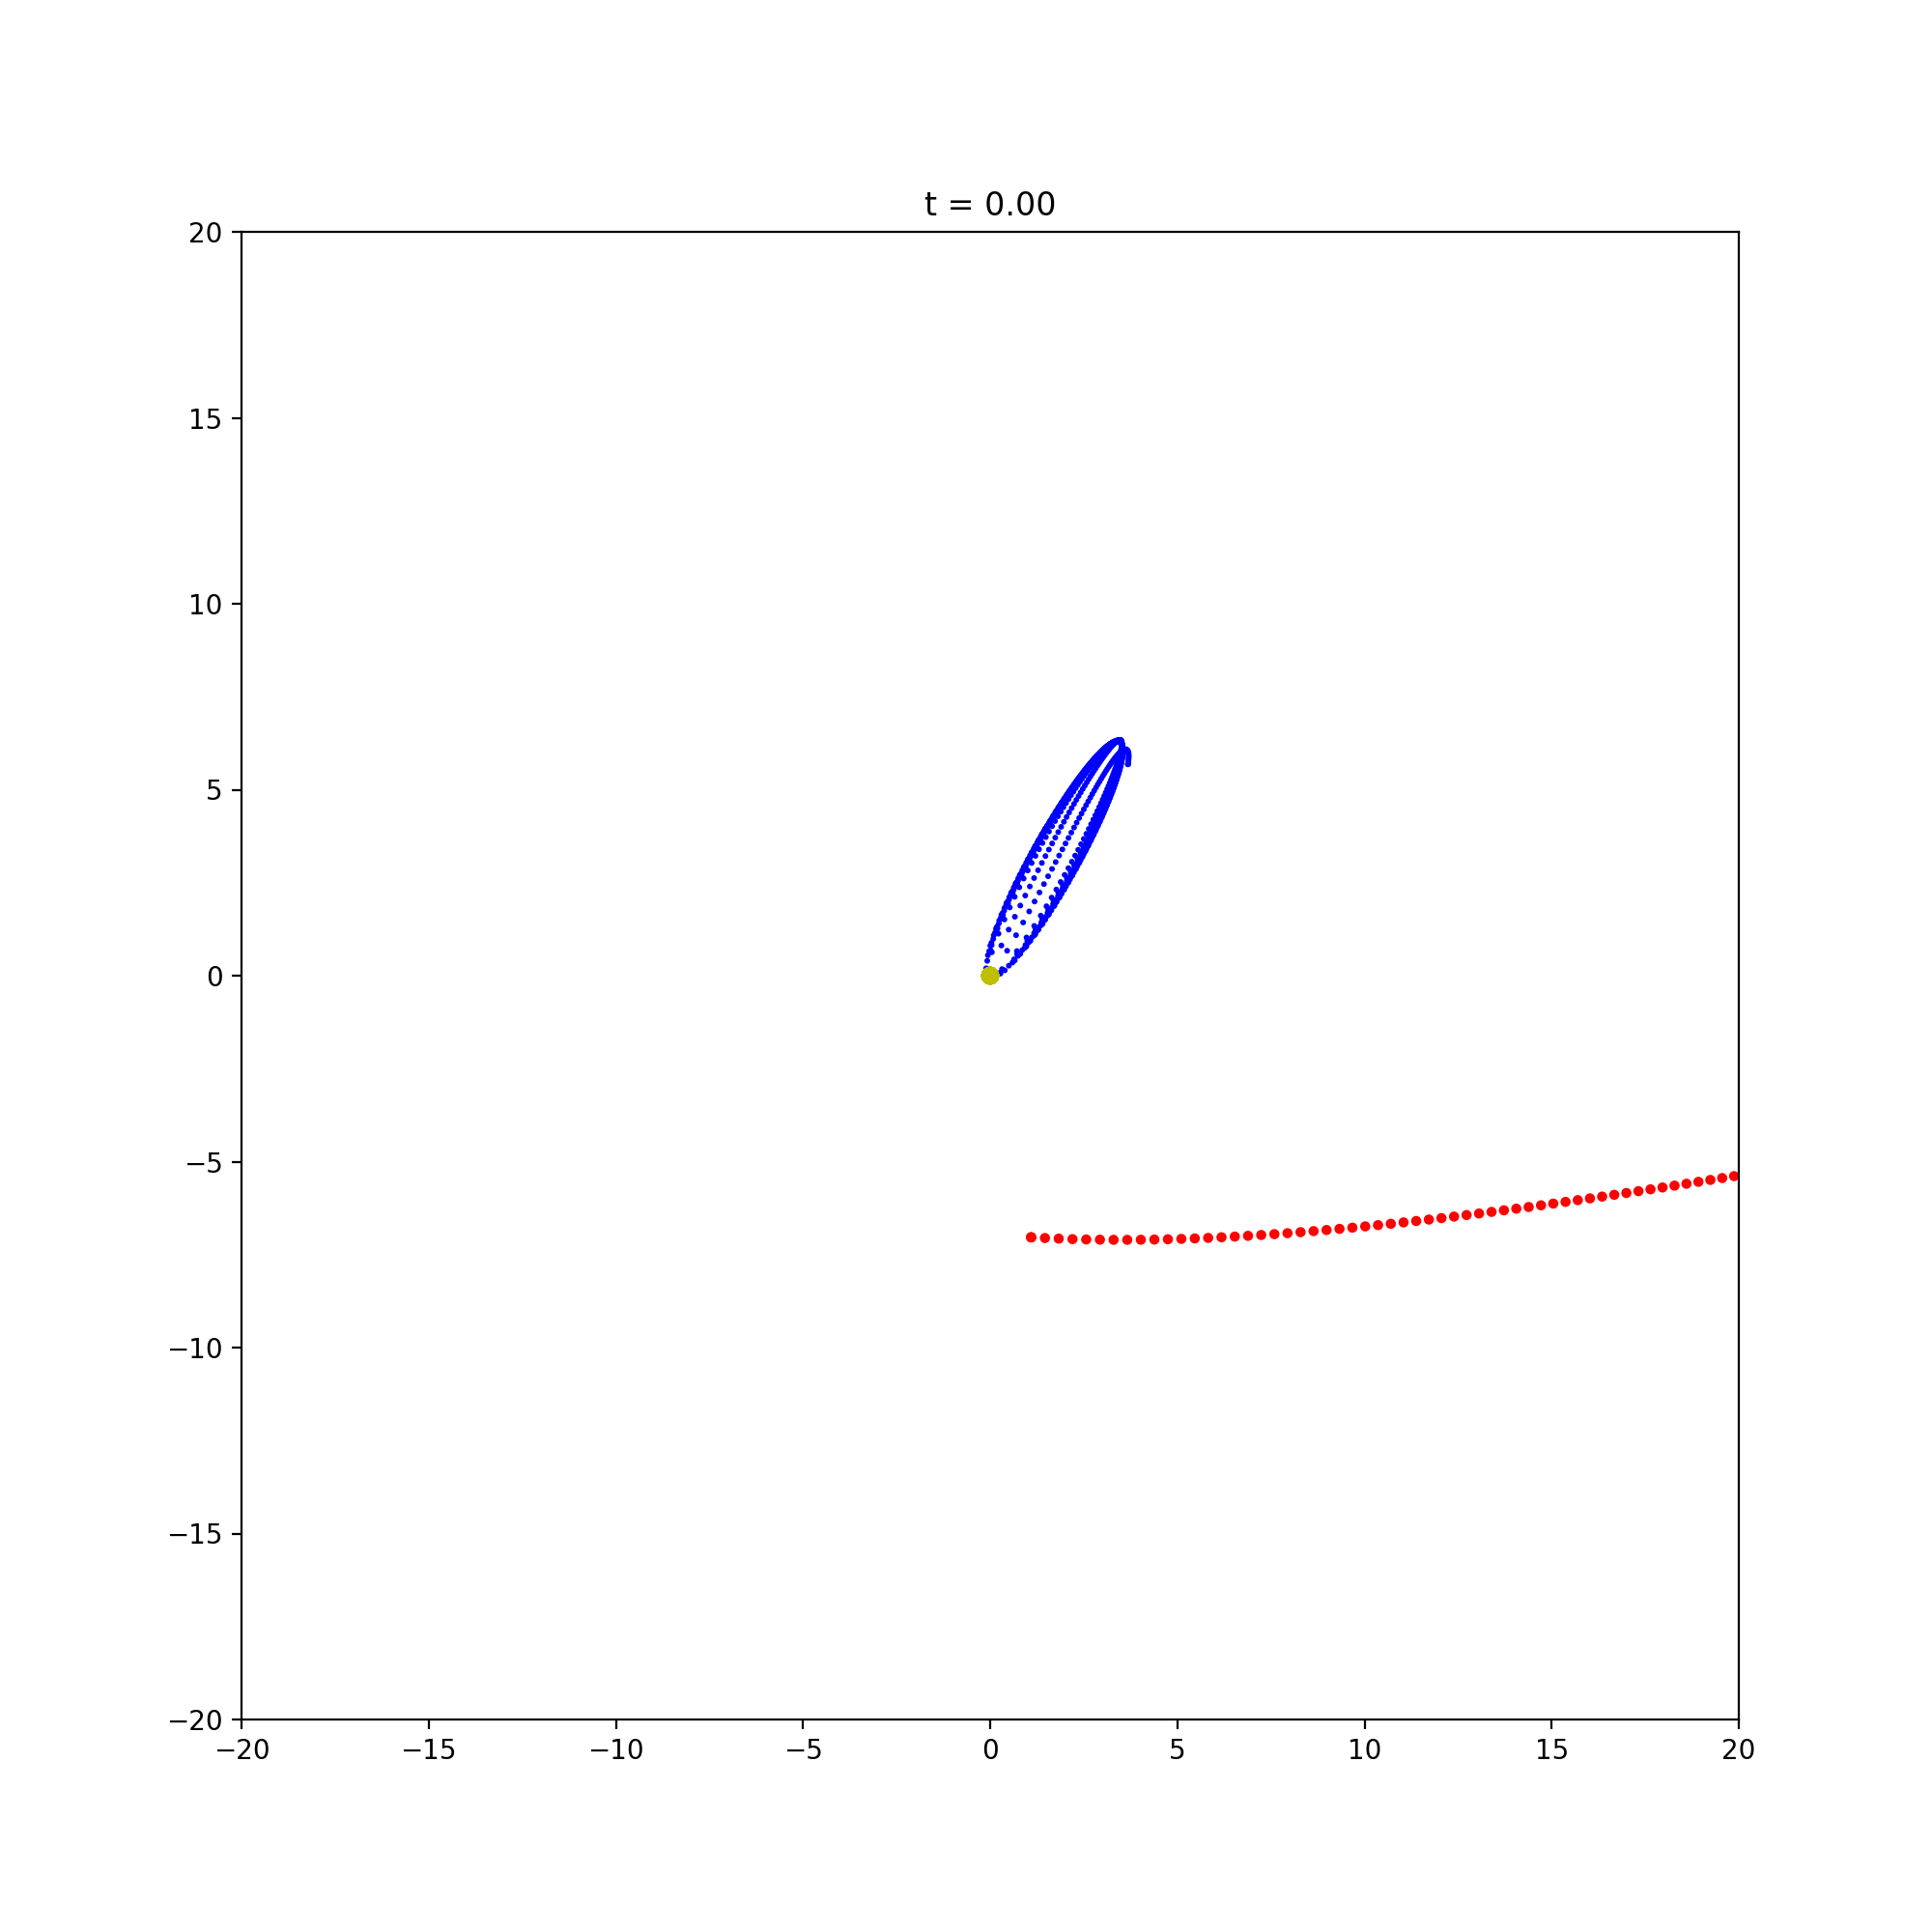

In [23]:

r=6.7717044682584095
rDot=0.796511341060855
theta=0.9960983981934229
thetaDot=0.051310824289771406
rj=7.119814660343734
rjDot=1.294703985533519
jTheta=4.866821752115331
jThetaDot=0.8441620986541364
sol1 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,60)).plot(times, ['r','rj'], x_axis = "time(years)", y_axis = "Distance(AU)");
sol1 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,60)).plot(times, ['theta','jTheta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");
sol1.animate(1000)

# Here is some old code when we deemed the small body to have negligible mass

In [ ]:
class negligibleMassPluto(P24ASolver):
    """
    Simulate a planet orbiting the sun with another body in the same orbit.
    Assumes planet is negligibly affected by small mass.
    """

    def __init__(self, **kwargs):
        super().__init__(
            (('r', '$r$'), ('rDot', r'$\dot{r}$'),
             ('theta', r'$theta'), ('thetaDot', '$thetaDot$'))
        )
        # m is the small negligible mass, mj is planet
        # note, in solar masses/AU/years, GMs= 4pi^2
        self.rj = kwargs.get('rj', 5.2) # orbit radius of the planet in AU
        self.mj = kwargs.get('mj', 1) # planet mass in solar masses, 9.5e-4
        self.jInitialTheta = kwargs.get('jInitialTheta', 0) # initial planet angle
        self.r = kwargs.get('r', 5.2) # orbit radius of the small body
        self.m = kwargs.get('m', 2.71e7) # small body mass of moon in solar masses
        self.initialTheta = kwargs.get('initialTheta', np.pi/2) # initial angle of body
        self.rtol = kwargs.get('rtol', 1e-10)
        self.atol = kwargs.get('atol', 1e-10)

    def __str__(self):
        "Produce a string representation of the parameters"
        #fmt = r"$rj = {69911000:.2g}, mj = {1.898e27:.2g}, jInitialTheta = {m = {69911000:.2g}, jInitialTheta = {0:.2g}"
        # i didn't feel like doing this so i left it for now
        return fmt.format(self.R, self.m1, self.m2)

    def derivatives(self, t, Y):
        #need to update if small body runs into jupiter or sun
        GMs = 4*np.pi**2 #big G times mass of sun
        jTheta = np.sqrt(4*np.pi**2/(self.rj)**3)*t
        r, rDot, theta, thetaDot = Y  # unpack the values, jThetaDot2 because jThetaDot is pre loaded
        sSquared = r**2 + self.rj**2 - 2*r*self.rj*np.cos(theta - jTheta)#distance between the masses squared
        theta3 = np.arccos((self.rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r)) #angle between sun and planet with planetesimal as axis
        rDDot = -1 * (GMs/r**2 + GMs*self.mj*np.cos(theta3)/sSquared) + r*thetaDot**2
        thetaDDot = -GMs*self.mj*np.sin(theta3)/(r*sSquared) - 2*thetaDot*rDot/r
        return [rDot, rDDot, thetaDot, thetaDDot]

    def prepare_figure(self):
        """
        Function that creates the figure and axes for the animation.
        """

        fig, ax = plt.subplots(figsize=(10, 10))
        # We need to set the axes limits so each frame uses the same limits
        # I'll say that the center position of the first mass is at 2 and the second at 4
        ax.set_xlim((-20, 20))
        ax.set_ylim((-20, 20))

        self.shapes = []

        sun = Circle((0, 0), radius=0.2, color='y')
        ax.add_patch(sun)

        return fig, ax

    def draw_frame(self, t):
        """
        Draw frame for time t
        """

        r, rDot, theta, thetaDot = self(t)
        rj = self.rj
        jTheta = np.sqrt(4*np.pi**2/(self.rj)**3)*t
        while self.shapes:
            self.shapes[0].remove()

        jupiter = Circle((rj * np.cos(jTheta), rj * np.sin(jTheta)), radius=0.05, color="r")
        small_body = Circle((r * np.cos(theta), r * np.sin(theta)), radius=0.02, color="b")
        self.shape = [jupiter, small_body]
        
        # render
        self._ax.add_patch(jupiter)
        self._ax.add_patch(small_body)
        sSquared = r**2 + self.rj**2 - 2*r*self.rj*np.cos(theta - jTheta)
        title = self._ax.set_title(f"t = {t:.2f}, theta3 = {np.arccos((self.rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r))}", usetex=False)

        # By returning the list of Artists that have changed,
        # we speed up the animation
        return jupiter, small_body, title

In [ ]:
times = np.linspace(0, 20, 401) 
# Y0 = r, rDot, theta, thetaDo
#t ... no starting parameters for jupiter
sol2 = negligibleMassPluto().solve((5.3, 0, np.pi/2, 0), (0,20)).plot(times, ['r'], x_axis = "time(years)", y_axis = "Distance(AU)");
sol2 = negligibleMassPluto().solve((5.3, 0, np.pi/2, 0), (0,20)).plot(times, ['theta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");


In [ ]:
sol2.animate(300)

In [ ]:
def randomPlutoGenerator(numSimulations):
    '''runs multiple simulations of our negligibleMassPluto class with random starting points, 
    plots and simulates results'''
    times = np.linspace(0, 20, 401) 
    for i in range(numSimulations):
        # Y0 = r, rDot, theta, thetaDot ... no starting parameters for jupiter
        r = random.uniform(0.5, 10)
        rDot = random.uniform(0, 3)
        theta = random.uniform(0, np.pi*2)
        thetaDot = random.uniform(0, 1)
        print(f"r={r}, rDot={rDot}, theta={theta}, thetaDot={thetaDot}")
        sol2 = negligibleMassPluto().solve((r, rDot, theta, thetaDot), (0,20)).plot(times, ['r'], x_axis = "time(years)", y_axis = "Distance(AU)");
        sol2 = negligibleMassPluto().solve((r, rDot, theta, thetaDot), (0,20)).plot(times, ['theta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");
        sol2.animate(300)

randomPlutoGenerator(4)

In [ ]:
'''todo:
- write code that stops simulation if body runs into planet or sun
- figure out how to save simulation after it is done running (both as video and as final image)
- put figures of simulations on subplots 
- figure out what we'd like to display/conclude from our simulation (maybe we test existing ejection constants, 
figure out size of planet needed to clear orbit, etc.)
- update picture to include theta 4
'''